<center>
<h1>Final Project 1</h1><br>
<h2>ENGL64.05 / QSS 30.16 22F</h2>
</center>


----

This assignment will reproduce one of the products of digital humanities research covered in course readings. We will take a closer look at Andrew Piper's Plot (Lack) research in Enumerations: Data and Literary Study


In [7]:
## Section 1: Vectorization

In [8]:
import os
import csv
import numpy as np
import sklearn
from operator import itemgetter

import sys
sys.path.append('shared/ENGL64.05-22F/lib')

from tsvdro import tsvdro

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(input='filename', 
                             stop_words= None,
                             strip_accents='unicode')

In [10]:
#Vectorize all of the Books
import glob as glob
glob.glob("Inaugurational Addresses/*")

['Inaugurational Addresses/1933FDR.txt',
 'Inaugurational Addresses/1845Polk.txt',
 'Inaugurational Addresses/1829Jackson.txt',
 'Inaugurational Addresses/1949Truman.txt',
 'Inaugurational Addresses/2021Biden.txt',
 'Inaugurational Addresses/1893Cleveland2.txt',
 'Inaugurational Addresses/1849Taylor.txt',
 'Inaugurational Addresses/1797Adams.txt',
 'Inaugurational Addresses/2001WBush.txt',
 'Inaugurational Addresses/1825QuincyAdams.txt',
 'Inaugurational Addresses/1953Eisenhower.txt',
 'Inaugurational Addresses/1977Carter.txt',
 'Inaugurational Addresses/1921Harding.txt',
 'Inaugurational Addresses/1837vanBuren.txt',
 'Inaugurational Addresses/1897Mckinley.txt',
 'Inaugurational Addresses/1789GeorgeWashington.txt',
 'Inaugurational Addresses/1817Monroe.txt',
 'Inaugurational Addresses/1877Hayes.txt',
 'Inaugurational Addresses/1905TRoosevelt.txt',
 'Inaugurational Addresses/2009Obama.txt',
 'Inaugurational Addresses/1881Garfield.txt',
 'Inaugurational Addresses/1809Madison.txt',
 'Inau

In [11]:
source_text = "Inaugurational Addresses/1789GeorgeWashington.txt"

In [12]:
# This does the actual vectorization
dtm = vectorizer.fit_transform([source_text])

# Return total number of documents and the number of items in the vocabulary
dc, vc = dtm.shape
print("document count:",dc,"vocabulary count:",vc)

document count: 1 vocabulary count: 595


In [13]:
# what are the top terms?
vocab_sums = dtm.sum(axis=0)
sorted_vocab = [(v, vocab_sums[0, i]) for v, i in vectorizer.vocabulary_.items()]
sorted_vocab = sorted(sorted_vocab, key = lambda x: x[1], reverse = False)

# display top one hundred most uncommon words
for i in range(1,100):
    print(sorted_vocab[i][0],"->",sorted_vocab[i][1])

among -> 1
vicissitudes -> 1
incident -> 1
life -> 1
filled -> 1
greater -> 1
anxieties -> 1
notification -> 1
transmitted -> 1
received -> 1
14th -> 1
month -> 1
summoned -> 1
hear -> 1
veneration -> 1
had -> 1
chosen -> 1
fondest -> 1
predilection -> 1
flattering -> 1
hopes -> 1
decision -> 1
asylum -> 1
declining -> 1
years -> 1
dear -> 1
addition -> 1
habit -> 1
inclination -> 1
frequent -> 1
interruptions -> 1
health -> 1
gradual -> 1
waste -> 1
committed -> 1
time -> 1
other -> 1
magnitude -> 1
difficulty -> 1
called -> 1
sufficient -> 1
awaken -> 1
wisest -> 1
experienced -> 1
her -> 1
distrustful -> 1
scrutiny -> 1
overwhelm -> 1
despondence -> 1
inheriting -> 1
inferior -> 1
endowments -> 1
unpracticed -> 1
duties -> 1
civil -> 1
conscious -> 1
deficiencies -> 1
conflict -> 1
emotions -> 1
aver -> 1
faithful -> 1
study -> 1
collect -> 1
appreciation -> 1
circumstance -> 1
affected -> 1
hope -> 1
if -> 1
executing -> 1
task -> 1
much -> 1
swayed -> 1
grateful -> 1
remembrance -

In [14]:
## Section 2: Vectorization for the Whole Dataset

In [15]:
book_texts = glob.glob("Inaugurational Addresses/*")

In [16]:
import os
short_names = [os.path.basename(f) for f in book_texts]

In [17]:
labels = [f[:7] for f in short_names]
print(short_names)

['1933FDR.txt', '1845Polk.txt', '1829Jackson.txt', '1949Truman.txt', '2021Biden.txt', '1893Cleveland2.txt', '1849Taylor.txt', '1797Adams.txt', '2001WBush.txt', '1825QuincyAdams.txt', '1953Eisenhower.txt', '1977Carter.txt', '1921Harding.txt', '1837vanBuren.txt', '1897Mckinley.txt', '1789GeorgeWashington.txt', '1817Monroe.txt', '1877Hayes.txt', '1905TRoosevelt.txt', '2009Obama.txt', '1881Garfield.txt', '1809Madison.txt', '2017Trump.txt', '1961Kennedy.txt', '1965Johnson.txt', '1969Nixon.txt', '1869Grant.txt', '1989HWBush.txt', '1857Buchanan.txt', '1909Taft.txt', '1925Coolidge.txt', '1981Reagen.txt', '1841HenryHarrison.txt', '1929Hoover.txt', '1885Cleveland1.txt', '1853Pierce.txt', '1889Harrison.txt', '1993Clinton.txt', '1861Lincoln.txt', '1801Jefferson.txt', '1913Wilson.txt']


In [18]:
dtm = vectorizer.fit_transform(book_texts)

dc, vc = dtm.shape
print("document count:",dc,"vocabulary count:",vc)

document count: 41 vocabulary count: 8247


In [19]:
# create dictionary mapping vocabulary index to word
idx2voc = dict([(v, k) for k, v in vectorizer.vocabulary_.items()])

In [20]:
## Section 2: Euclidean Similarity [Simple]

In [21]:
from sklearn.metrics import euclidean_distances
dist = euclidean_distances(dtm[0],dtm[1])[0][0]
print(short_names[0],"->",short_names[1],"=",dist)

1933FDR.txt -> 1845Polk.txt = 421.32766346396005


In [22]:
# We can easily create a distance matrix for all our files easily enough
dist_matrix = euclidean_distances(dtm)

In [23]:
# NumPy's argsort can sort distances from a selected (our first text, in this example) row in the matrix:
for i in np.argsort(dist_matrix[0]):
    print(short_names[i],dist_matrix[0][i])

1933FDR.txt 0.0
1801Jefferson.txt 76.07890640644094
1913Wilson.txt 81.1664955508121
1829Jackson.txt 87.69264507357501
1789GeorgeWashington.txt 89.11228871485683
1893Cleveland2.txt 91.90212184710427
1809Madison.txt 91.90756225686764
1969Nixon.txt 95.0789145920377
1849Taylor.txt 96.61780374237452
1885Cleveland1.txt 97.79059259458448
1961Kennedy.txt 99.73464794142505
1965Johnson.txt 101.5036945140422
1981Reagen.txt 101.57755657624375
1949Truman.txt 102.61091559868278
2009Obama.txt 112.61438629233834
1993Clinton.txt 112.80957406177899
1869Grant.txt 112.8583182578936
1989HWBush.txt 113.14592347937243
1905TRoosevelt.txt 117.36268572250722
2001WBush.txt 122.95120983544652
1953Eisenhower.txt 123.30450113438681
1797Adams.txt 123.97983707038819
2017Trump.txt 125.72986916401369
1977Carter.txt 129.46428078817723
2021Biden.txt 132.41223508422476
1857Buchanan.txt 160.76691201861158
1877Hayes.txt 160.822883943797
1853Pierce.txt 185.14858897652988
1921Harding.txt 186.30351580150065
1817Monroe.txt 221.

In [24]:
## Section 3: Plotting Data with MDS [Simple]

In [25]:
import glob as glob
source_texts = glob.glob("Inaugurational Addresses/*")

In [26]:
labels = [os.path.basename(f) for f in source_texts]

In [27]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_dist_matrix = 1 - cosine_similarity(dtm)

In [28]:
from sklearn.manifold import MDS
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(cosine_dist_matrix)

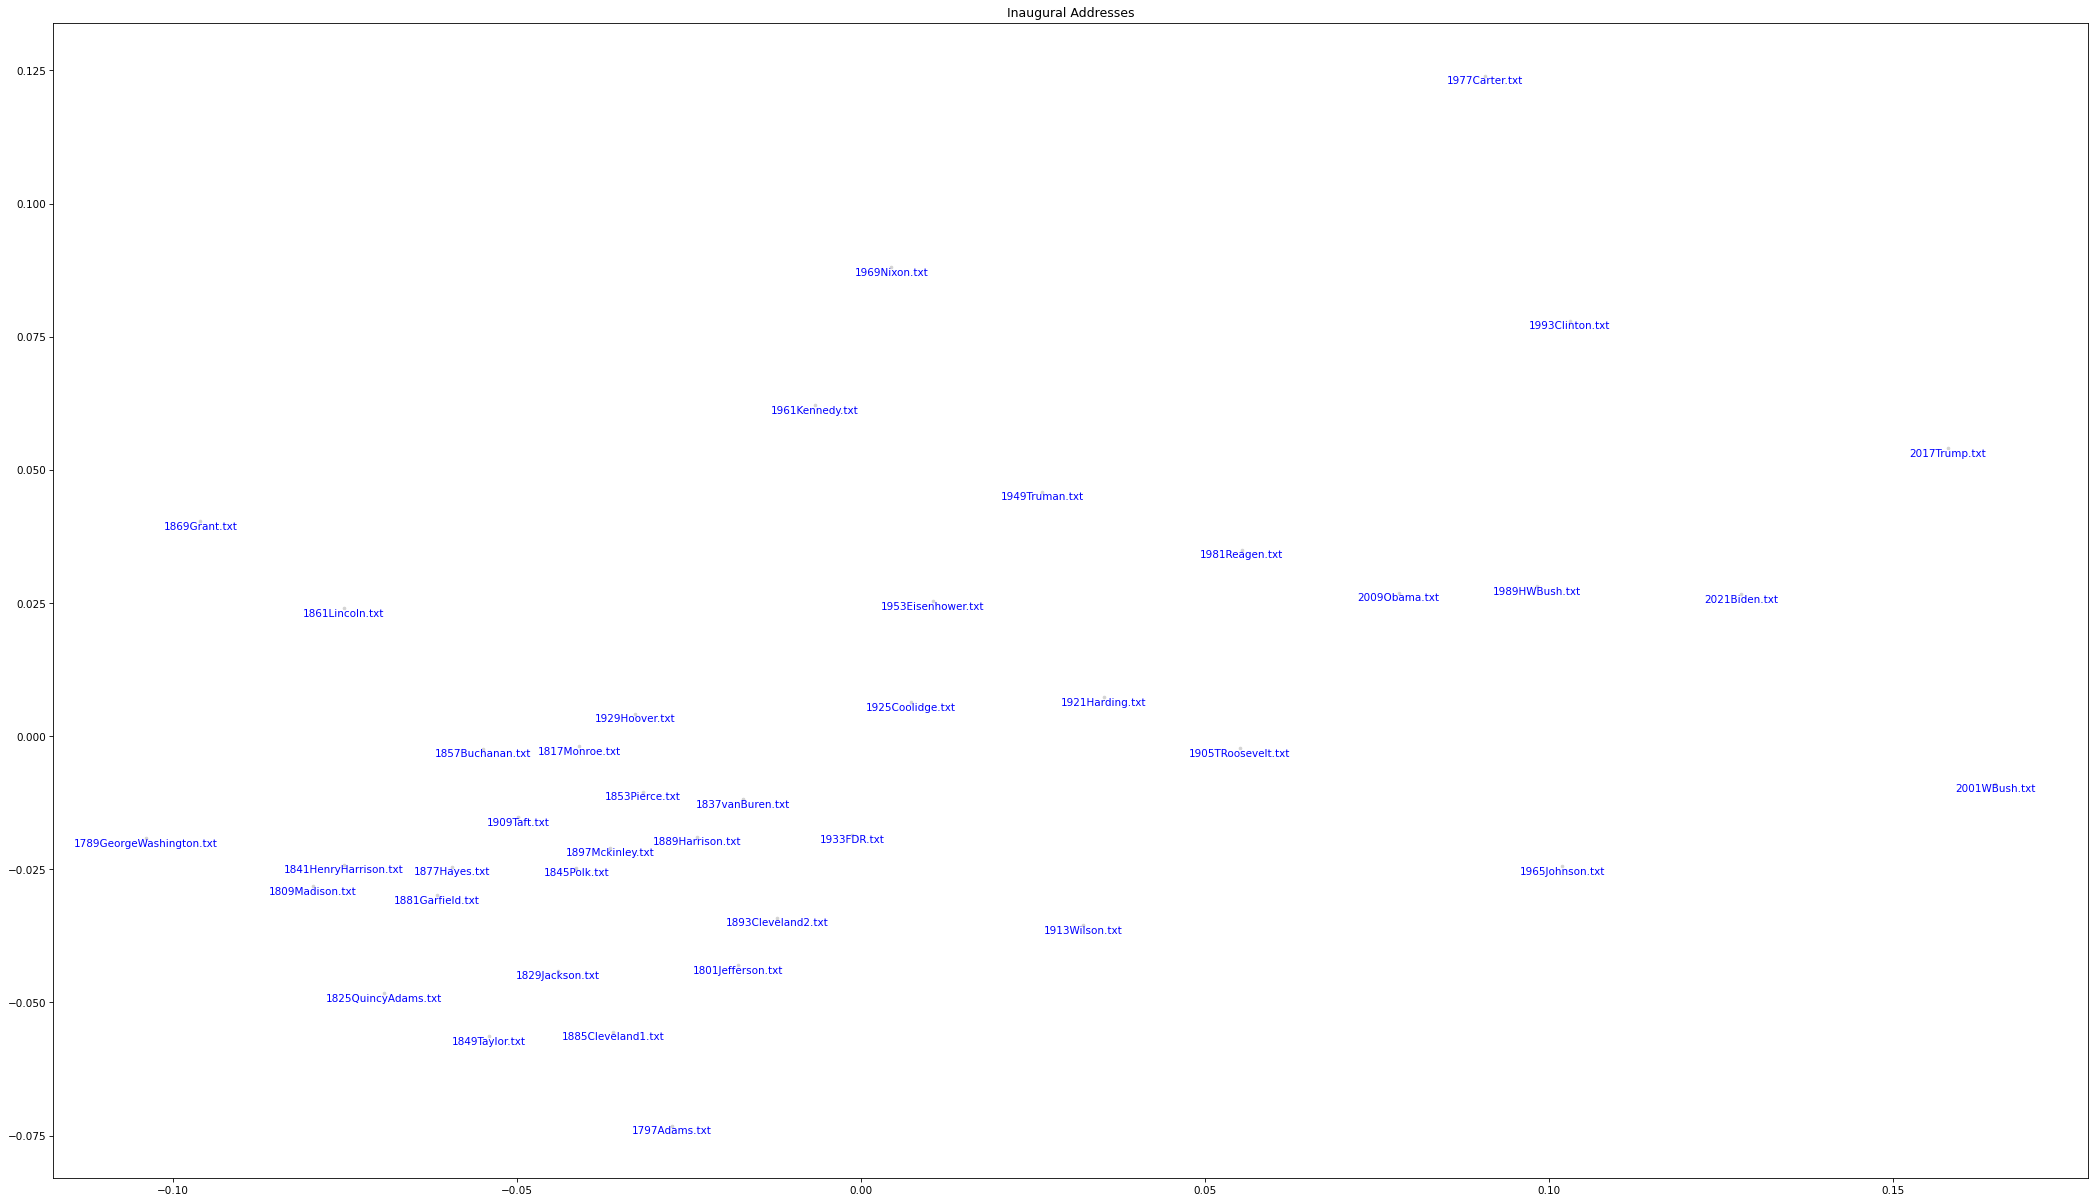

In [29]:
# Visualize the results of MDS
# 
# NOTE: you might need to click on the image to expand it enough to read it. 
# 

import matplotlib.pyplot as plt
xs, ys = pos[:, 0], pos[:, 1]
fig = plt.figure(figsize=(35, 20), dpi=75)

# this will loop through four different lists simultaneously
for x, y, label in zip(xs, ys, labels):

    # plot the point itsself
    plt.scatter(x, y, c='lightgrey',s=6)

    # This line will annotate the point by displaying 
    # the label in blue
    plt.text(x, y, label, c="blue", ha='center', va='top')

    plt.axis('on')
plt.title('Inaugural Addresses')
plt.show()

In [30]:
#Section 4 Bing Sentiment

In [37]:
# import required libraries
import statistics
from glob import glob
import numpy as np

from nltk.tokenize import sent_tokenize, word_tokenize

In [38]:
# load Bing sentiment lexicons for positive and negative words
with open('shared/ENGL64.05-22F/lexicons/bing_positive-words.txt') as fp:
    bing_positive = fp.read().splitlines() 

with open('shared/ENGL64.05-22F/lexicons/bing_negative-words.txt') as fp:
    bing_negative = fp.read().splitlines() 

In [39]:
def sentiment_orientation(text):
    # determine if we need to tokenize or not
    if type(text) == str:
        # tokenize string
        text = word_tokenize(text)

    with open('shared/ENGL64.05-22F/lexicons/bing_positive-words.txt') as fp:
        bing_positive = fp.read().splitlines() 

    with open('shared/ENGL64.05-22F/lexicons/bing_negative-words.txt') as fp:
        bing_negative = fp.read().splitlines() 
    
    orientation = []
    count = 0
    for word in text:
        if word in bing_positive:
            count = count + 1
        if word in bing_negative:
            count = count - 1

    if count > 0:
        orientation = "Positive"
    if count < 0:
        orientation = "Negative"
    if count == 0:
        orientation = "Neutral"
    
    # You'll need to iterate through the text variable (it should be a list) and check to 
    # see if the word is positive or negative and then assign a sentiment orientation 
    # based on a total score.

    return(count)

In [40]:
# now evaluate a sample product/film/book review that you found on the Web
import glob as glob
review = glob.glob('Inaugurational Addresses/*')

sentiment_data = list()
for page in review:
    raw_text = open(page).read()
    tokens = word_tokenize(raw_text)
    sentiment_data.append(sentiment_orientation(tokens))

In [41]:
def rescale(values):
    scaled = 2 * (values - min(values))/( max(values) - min(values)) -1
    return(scaled)

# we can convert our list to a numpy array and then perform a vector operation
# on all the data to scale it.
data = np.asarray(sentiment_data)
scaled = rescale(data)

Text(0, 0.5, 'Mean Sentiment')

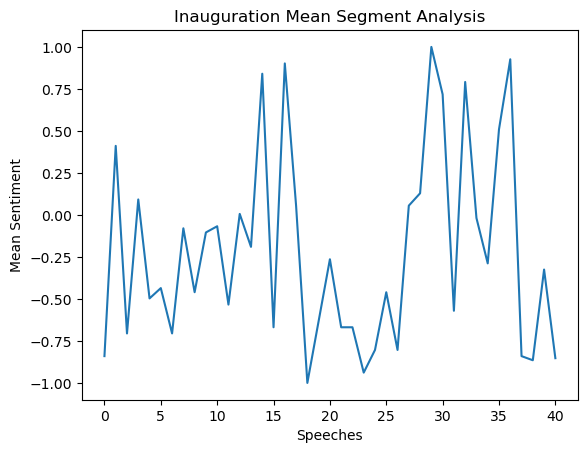

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(scaled)
plt.title("Inauguration Mean Segment Analysis")
plt.xlabel("Speeches")
plt.ylabel("Mean Sentiment")

In [ ]:
#Section 5 Speech Rating Tool

In [77]:
from textblob import TextBlob
import glob as glob

In [82]:
review = glob.glob('Inaugurational Addresses/*')
for page in review:
    raw_text = open(page).read()
    blob = TextBlob(raw_text)
    star_rating(blob)

⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐
⭐⭐⭐


In [80]:
def star_rating(blob):
    rating = blob.sentiment[0]
    if rating <= -0.5:
        print("⭐")
    if -0.5 < rating <= 0:
        print("⭐⭐")
    if 0 < rating <= 0.5:
        print("⭐⭐⭐")
    if 0.5 < rating <= 1:
        print("⭐⭐⭐⭐")